In [1]:
from selectkbest import *
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [2]:
#initialize LinReg and fit to training data
lr = LinearRegression()
model_3 = lr.fit(features_selected_train_k_best, y_train)

In [3]:
features_selected_test_k_best = features_interactions_test[features_selected_train_k_best.columns]
y_pred_3 = model_3.predict(features_selected_test_k_best)

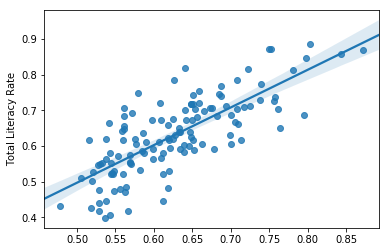

In [4]:
sns.regplot(y_pred_3, y_test)

In [5]:
r2_3 = model_3.score(features_selected_train_k_best, y_train)
ar2_3 = 1 - (1-model_3.score(features_selected_train_k_best, y_train))*(len(y_test)-1)/(len(y_test)-features_selected_test_k_best.shape[1]-1)

In [6]:
print('R2:', r2_3, 'AdjustR2:', ar2_3)
print('MSE:', mean_squared_error(y_test, y_pred_3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_3)))
print('Normalized RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_3))/ y_test.std())

R2: 0.4477962633731406 AdjustR2: 0.3901750038990336
MSE: 0.004927381583023808
RMSE: 0.07019531026374773
Normalized RMSE: 0.6458370294493181


In [7]:
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)
kfold20 = KFold(n_splits=20, shuffle=True, random_state=42)

In [8]:
cv_5_results = np.mean((cross_val_score(model_3, features_selected_train_k_best, y_train, cv=kfold5)))
cv_10_results = np.mean((cross_val_score(model_3, features_selected_train_k_best, y_train, cv=kfold10)))
cv_20_results = np.mean((cross_val_score(model_3, features_selected_train_k_best, y_train, cv=kfold20)))

In [9]:
print(cv_5_results, cv_10_results, cv_20_results)

0.40427193464991695 0.37255431400276956 0.3472009928804133
